# Acquire data from Google Sheets

In [1]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [32]:
import pandas as pd
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1t8YQOowjGDmUWrSXIpCA0-O09NT5a3RHCyzSzWJQDEo/edit?usp=sharing') # 'https://docs.google.com/spreadsheets/d/1YgjesgjYJh315Kj823ddOlSBEr1bf3AMfDaN3c34_PU/edit?usp=sharing')
sheet = wb.worksheet('Sheet1')
# Now that we have the tab specified it’s time to get the data. To do this we will just call the get_all_values() function off of the sheet object we created above:
data = sheet.get_all_values()

df = pd.DataFrame(data[1:])
df.columns = data[0]

In [33]:
import numpy as np
df[df==''] = np.nan
df = df.drop('Red', axis=1)
df = df.dropna(axis=0)
df.to_csv('PurpleColorConstituentsSurveyData.csv', index=None)

# Read the cleaned data back into a pandas data frame

In [34]:
myData = pd.read_csv('PurpleColorConstituentsSurveyData.csv')
myData

,Blue,Green,Purple,Date
0,36,178,0,2020-07-09 11:51:47
1,194,1,0,2020-07-09 12:05:35
2,252,164,0,2020-07-09 12:08:42
3,137,164,0,2020-07-09 12:10:43
4,147,79,1,2020-07-09 12:11:32
5,29,216,0,2020-07-09 12:18:23
6,168,85,1,2020-07-09 12:23:26
7,171,96,1,2020-07-09 12:25:54
8,46,217,0,2020-07-09 12:26:20
9,166,59,0,2020-07-09 12:26:45


# Sklearn Logistic Regression model

In [35]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics


X=myData[['Green', 'Blue']]  # Features
y=myData['Purple']  # Labels

myModel = LogisticRegression()
myModel.fit(X,y)

y_pred = myModel.predict([[200, 100]])[0]
y_pred

0

In [36]:
y_pred = myModel.predict(X)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1])

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix_0 = confusion_matrix (y, y_pred)
confusion_matrix_0

array([[34,  3],
       [10,  3]])

# Lets try non-linear classification (kNN algorithm)

In [38]:
import csv
import numpy as np
colorScores = []
with open('PurpleColorConstituentsSurveyData.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        colorScores.append(row)
f.close()

colorScores = colorScores[1:]
colorScores

[['36', '178', '0', '2020-07-09 11:51:47'],
 ['194', '1', '0', '2020-07-09 12:05:35'],
 ['252', '164', '0', '2020-07-09 12:08:42'],
 ['137', '164', '0', '2020-07-09 12:10:43'],
 ['147', '79', '1', '2020-07-09 12:11:32'],
 ['29', '216', '0', '2020-07-09 12:18:23'],
 ['168', '85', '1', '2020-07-09 12:23:26'],
 ['171', '96', '1', '2020-07-09 12:25:54'],
 ['46', '217', '0', '2020-07-09 12:26:20'],
 ['166', '59', '0', '2020-07-09 12:26:45'],
 ['120', '252', '0', '2020-07-09 12:28:35'],
 ['185', '127', '1', '2020-07-09 13:31:49'],
 ['140', '242', '0', '2020-07-14 14:55:47'],
 ['254', '142', '1', '2020-07-14 14:57:01'],
 ['6', '16', '0', '2020-07-14 14:57:14'],
 ['59', '164', '0', '2020-07-14 14:57:47'],
 ['105', '120', '0', '2020-07-14 14:59:25'],
 ['28', '108', '0', '2020-07-14 14:59:48'],
 ['21', '119', '0', '2020-07-14 15:00:45'],
 ['109', '51', '1', '2020-07-14 15:01:08'],
 ['219', '63', '1', '2020-07-14 15:01:09'],
 ['26', '142', '0', '2020-07-14 15:01:19'],
 ['226', '186', '0', '2020-0

In [70]:
processedScores=[]
for j in range(len(colorScores)):
    processedScores.append([])
    for i in range(len(colorScores[j])-1):
        processedScores[j].append(int(colorScores[j][i]))
finalScores = []
for row in processedScores:
    finalScores.append(np.asarray(row))
    
# red = int(input('enter the red value: '))
green = int(input('enter the green value: '))
blue = int(input('enter the blue value: '))

    
# inputColor = np.asarray([red,green,blue])
inputColor = np.asarray([blue,green])


enter the green value: 10
enter the blue value: 100


In [71]:
k=6

distList = []
for i in range(len(finalScores)):
    dist = np.linalg.norm(inputColor-finalScores[i][0:2])
    distList.append(dist)

nearestNeighborsList = []
for j in range(k):
    nearestNeighborsList.append(distList.index(min(distList)))
    distList.remove(min(distList))
    
total = 0
for l in range(k):
    total = total + finalScores[nearestNeighborsList[l]][2]

average = total/k

print(average)


if average < 0.5:
    print("probably not purple")
else:
    print("probably purple")

0.6666666666666666
probably purple


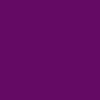

In [72]:
from colorsys import hsv_to_rgb
from PIL import Image

colors = []
for hue in range(100):
    for sat in range(100):
        # Convert color from HSV to RGB
        rgb = [100, inputColor[1], inputColor[0]]
        colors.extend(rgb)

im = Image.frombytes("RGB", (100, 100), bytes(colors))
im


In [73]:
myModel.predict([inputColor])[0]

0